# Turb2D 2021 Data

Please find a link to download two image sequences of the same 2D turbulent flow with the reference displacement in pixel between two consecutive images.

https://filesender.renater.fr/?s=download&token=5ca5684c-c8eb-4686-a3f4-983f016c58dd

The flow is described in the following report (p.15 cases C1a and C1b):

https://filesender.renater.fr/?s=download&token=814b8e6a-f061-4252-b886-abe380735b39


### On OSPC
Data are stored in `~/Documents/Datasets/2021-Turb2D/`

## Load U and V vectors from txt

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
from IPython.display import HTML

## PROCESS FILES
### Extract TEXT (X,Y,U,V)

In [17]:
# img_dir = '../../../Datasets/2021-Turb2D/shifttruth1000-txt.txt/'
# imgs = sorted(glob.glob(img_dir + '*.txt'))

# nimgs = len(imgs)

# Turb2D = np.zeros((nimgs,256,256,4))

# for i, img_path in enumerate(tqdm(imgs)):
#     img = np.loadtxt(open(img_path, "rb"))
#     for v in range(4):
#         Turb2D[i,:,:,v] = img[:,v].reshape(256,256)

# outfile = '../data/2021-Turb2D_velocities.npy'
# np.save(outfile, Turb2D)

### Extract Particles

In [18]:
# img_dir = '../../../Datasets/2021-Turb2D/particle/'
# imgs = sorted(glob.glob(img_dir + '*.tif'))

# nimgs = len(imgs)

# Turbo2DParticles = np.zeros((nimgs, 256,256))

# for i, img_path in enumerate(tqdm(imgs)):
#     img = plt.imread(img_path)
#     Turbo2DParticles[i,:,:] = img

# outfile = '../data/2021-Turb2D_particles.npy'
# np.save(outfile, Turbo2DParticles)

## Extract Scalar

In [19]:
# img_dir = '../../../Datasets/2021-Turb2D/scalar/'
# imgs = sorted(glob.glob(img_dir + '*.tif'))

# nimgs = len(imgs)

# Turbo2DScalar = np.zeros((nimgs, 256,256))

# for i, img_path in enumerate(tqdm(imgs)):
#     img = plt.imread(img_path)
#     Turbo2DScalar[i,:,:] = img

# outfile = '../data/2021-Turb2D_scalar.npy'
# np.save(outfile, Turbo2DScalar)

## Visualize Data

In [20]:
Velocities = np.load('../data/2021-Turb2D_velocities.npy')
Scalars = np.load('../data/2021-Turb2D_scalar.npy')
Particles = np.load('../data/2021-Turb2D_particles.npy')

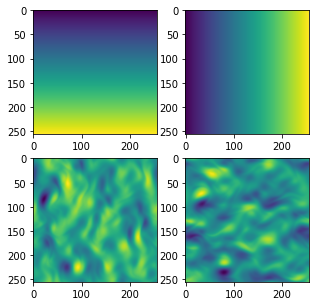

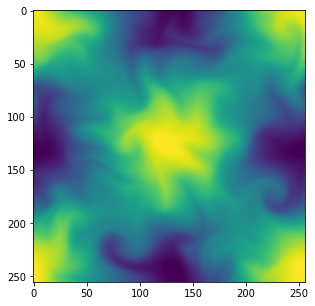

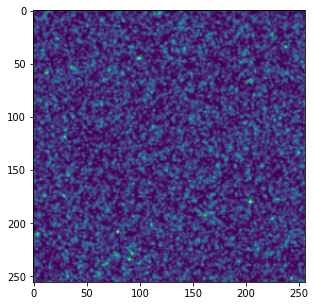

In [21]:
img = 10

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(Velocities[img,:,:,0])
plt.subplot(222)
plt.imshow(Velocities[img,:,:,1])
plt.subplot(223)
plt.imshow(Velocities[img,:,:,2])
plt.subplot(224)
plt.imshow(Velocities[img,:,:,3])

plt.figure(figsize=(5,5))
plt.imshow(Scalars[img,:,:])

plt.figure(figsize=(5,5))
plt.imshow(Particles[img,:,:])

In [22]:
fig, axarr = plt.subplots(1,2, figsize=(10,10))

ims = []
for i in tqdm(range(100)):
       
    im1 = axarr[0].imshow(Scalars[i,:,:], animated=True)
    im2 = axarr[1].imshow(Particles[i,:,:], animated=True)
    
    ims.append([im1, im2])
    
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)

plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/100 [00:00<?, ?it/s]

## Process Data

In [23]:
from turboflow.utils import physics as ph

Warning *** CHECK THE GRADIENT DIRECTION


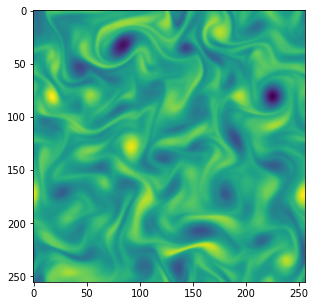

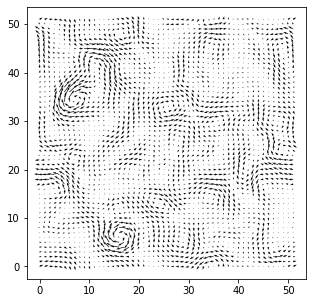

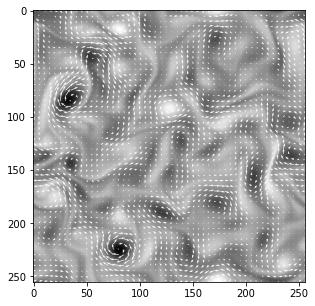

In [25]:
n = 10

U = Velocities[n,:,:,2]
V = Velocities[n,:,:,3]

# attention might be V <-> U

vorticity = ph.compute_vorticity(U, V)

plt.figure(figsize=(5,5))
plt.imshow(vorticity.T)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ph.plot_field(V, U, step=5, scale=1, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ph.plot_field(V, U, step=5, scale=1, img=vorticity, ax=ax)
plt.show()

In [30]:
fig, axarr = plt.subplots(figsize=(10,10))

ims = []
for i in tqdm(range(100)):
    
    U = Velocities[i,:,:,2]
    V = Velocities[i,:,:,3]

#     vorticity = ph.compute_vorticity(U, V)
       
    im1 = ph.plot_field(V, U, step=5, scale=1, ax=axarr)
    
    ims.append([im1])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/100 [00:00<?, ?it/s]